# Advanced Time Series Concepts

**High-Level Summary**

 - **Auto Correlation and Partial Auto Correlation** - Method to choose the right model for forecasting.

 - **Modeling using Auto Regressing** - Understand how we can build this model and use it for Forecasting.
 - **Moving Average Smoothing** - The time series data has a lot of noise. We have to smoothen the noise and use the data for developing models.
 - **ARMA and ARIMA** - Very powerful models for Time Series Forecasting.
 - **Exponential Smoothing** - Another important concept! 
 - **Multivariate Time Series Modeling**.

**Auto Correlation Function**

Auto Correlation is a very important step in Time Series Model Building.

In this step, the data is **correlated with its lag values** to see how well the current value is related to the previous values.

Auto Correlation Function is used for quantifying this relationship.

In Time Series, the same data point is observed at different time intervals, hence the correlation of the current value with the previous values is known as ***Auto Correlation or Serial Correlation***.

If we take a lag of 1 time step and correlate the lag values with the actual values, we get the auto-correlation of lag 1. This process can be repeated for multiple lags.

**Auto-covariance** depends heavily on unit (e.g. stock prices in different units/ currencies). That's why **Auto-correlation** is used instead which is auto-covariance divided by variance (i.e. normalizing the data, making it unit less). Varies between -1 and +1.

**Application of ACF**

Fitting ACF is the first step during Model Building.

Depending on the pattern, we can decide what should be the order of the Auto Regression process.

**ACF Plot**

The ACF plot is a very useful graph while performing Time Series Modeling. It shows the correlation value for each lag.

An ideal ACF plot will decay exponentially. Depending on the ACF plot value, we can decide to stop at any given lag.

In [1]:
import pandas_datareader as pdr
appleData = pdr.get_data_yahoo('AAPL')

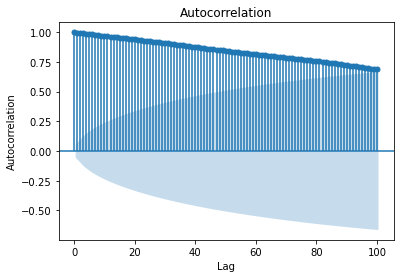

In [2]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(appleData.Close,lags=100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

**PACF**

Partial Auto Correlation is another important step in the Time Series Modeling Process.

The partial auto correlation at any given lag k is the correlation obtained after cancelling the effect of correlations due to terms at shorter lags.

In simple terms, in partial auto correlation, the effects due to intermediate terms are nullified to determine the correlation.

**Determining the PAC value**

If we have a time series that is represented by [yt , yt-1 , yt-2 , .... yt-s] and want to determine the Partial Auto Correlation between yt and yt-s, then we have to nullify the effect of all intermediate terms to get the PACF value.

The PACF values when plotted can help in **determining the order of the Auto Regressive process** using the number of significant correlations.

**Formula** for PAC between yt and yt-2: Covariance(yt, yt-2 | yt-1) / sqrt(variance(yt | yt-1) * variance(yt-2, yt-1))

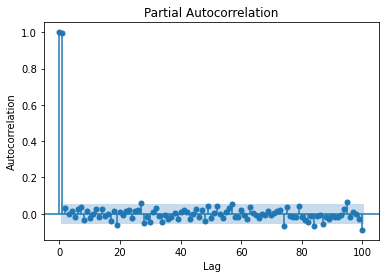

In [3]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(appleData.Close,lags=100)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

It is evident that the order of AR will be 2 for the time series from partial autocorrelation plot which was not clear with autocorrelation plot.

In [4]:
import pandas as pd
from pandas import Series
timeSeries = [30,21,29,31,40,48,53,47,37,39,31,29,17,9,20,24,27,35,41,38,
          27,31,27,26,21,13,21,18,33,35,40,36,22,24,21,20,17,14,17,19,
          26,29,40,31,20,24,18,26,17,9,17,21,28,32,46,33,23,28,22,27,
          18,8,17,21,31,34,44,38,31,30,26,32]
ts = Series(timeSeries)

In [5]:
from statsmodels.tsa.stattools import acf, pacf

In [6]:
acf_corr = acf(timeSeries, nlags=3, unbiased=True)
print(acf_corr)
type(acf_corr)

[1.         0.72120588 0.42688471 0.09746397]


/Users/smithkakar/.conda/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  """Entry point for launching an IPython kernel.
/Users/smithkakar/.conda/envs/ds/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


numpy.ndarray

In [7]:
pacf_corr = pacf(timeSeries, nlags=5)
print(pacf_corr)
type(pacf_corr)

[ 1.          0.72120588 -0.19433338 -0.28172395 -0.18857053  0.02711725]


numpy.ndarray

### AR Model

- Get the Data

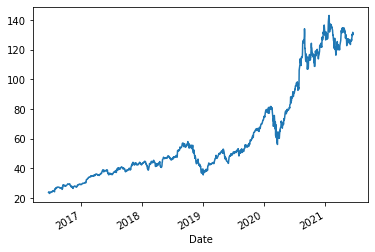

In [8]:
appleData = pdr.get_data_yahoo('AAPL')
appleData.Close.plot()
plt.show()

In [9]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [10]:
X = appleData.Close.values
train, test = X[1:len(X)-10], X[len(X)-10:]

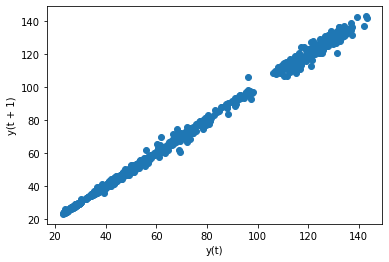

In [11]:
from pandas.plotting import lag_plot
lag_plot(appleData.Close)
plt.show()
# The plot shows good correlation with 1 lag.

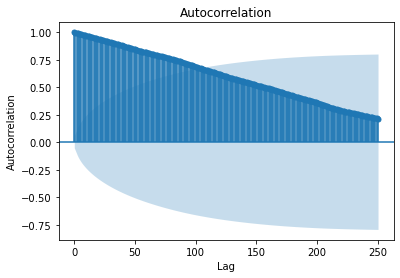

In [12]:
# Correlogram
plot_acf(appleData.Close,lags = 250)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [13]:
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 23
Coefficients: [ 0.07485513  0.89118182  0.125781   -0.03353928  0.03578599 -0.02305207
 -0.03856934  0.08212782 -0.05250921  0.0680951  -0.04528305 -0.01829309
  0.01120368 -0.04211692  0.04603263 -0.01289438  0.03662922 -0.05385563
  0.16209056 -0.10771499 -0.08403434  0.04627752 -0.04846689  0.05528443]


/Users/smithkakar/.conda/envs/ds/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, 

predicted=125.694087, expected=125.900002
predicted=125.535281, expected=126.739998
predicted=125.622130, expected=127.129997
predicted=126.488573, expected=126.110001
predicted=126.331127, expected=127.349998
predicted=126.179999, expected=130.479996
predicted=126.168448, expected=129.639999
predicted=126.636653, expected=130.149994
predicted=126.651111, expected=131.789993
predicted=126.881787, expected=130.460007
Test MSE: 8.705


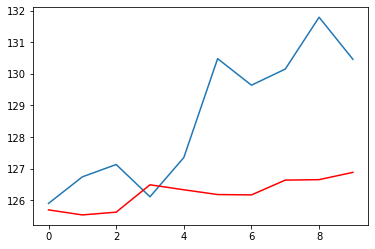

In [14]:
# Perform forecasting for the time series based on the length.
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [15]:
import pandas as pd
from pandas import Series
timeSeries = [30,21,29,31,40,48,53,47,37,39,31,29,17,9,20,24,27,35,41,38,
          27,31,27,26,21,13,21,18,33,35,40,36,22,24,21,20,17,14,17,19,
          26,29,40,31,20,24,18,26,17,9,17,21,28,32,46,33,23,28,22,27,
          18,8,17,21,31,34,44,38,31,30,26,32]
train, test = timeSeries[1:len(timeSeries)-10], timeSeries[len(timeSeries)-10:]

In [16]:
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 11
Coefficients: [17.61119882  0.60959022 -0.46145298  0.34147052 -0.5535399   0.50364582
 -0.57076599  0.40686544 -0.48981335  0.36377344 -0.51010253  0.64166238]


/Users/smithkakar/.conda/envs/ds/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, 

In [17]:
from sklearn.metrics import mean_squared_error
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
with open("output.txt", "w") as text_file:
    text_file.write("error = %f\n" % error)

predicted=13.925993, expected=17.000000
predicted=20.279285, expected=21.000000
predicted=26.556221, expected=31.000000
predicted=34.709756, expected=34.000000
predicted=39.324673, expected=44.000000
predicted=28.433625, expected=38.000000
predicted=27.219552, expected=31.000000
predicted=25.737600, expected=30.000000
predicted=23.488579, expected=26.000000
predicted=27.009755, expected=32.000000
Test MSE: 20.726


### Moving Average

 - Moving Average is a smoothing technique for reducing the noise in the Time Series Data.
 - It is used for exposing the signal that is in-between the noise.
 - The values are averaged at different time windows.
 
For prediction,

 - Not a very effective way to predict but can still be used to get a naive estimate.
 - The assumption to make is that the trend and seasonal components are nullified.
 - Can be used in a Walk Forward Manner.

**Centered Moving average**

In this case, the average is calculated for time steps before and after the given time step.

cma(t) = average(obs(t-1), obs(t), obs(t+1))

This method requires the **know how of the future values** to calculate the average. This technique is used for **detrending and removing any seasonal effects** on Time Series Data. This is **not** very useful for forecasting.

**Trailing Moving Average**

Trailing Moving Average uses historical observations for determining the future observation.

trail_moving_average(t) = average(obs(t-2), obs(t-1), obs(t))

In [18]:
appleData = pdr.get_data_yahoo('AAPL')
seriesData = Series(appleData.Close.values)
rolling = seriesData.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.head(10)

0          NaN
1          NaN
2    23.880000
3    23.963334
4    23.754167
5    23.461667
6    23.252500
7    23.335833
8    23.632500
9    23.824167
dtype: float64

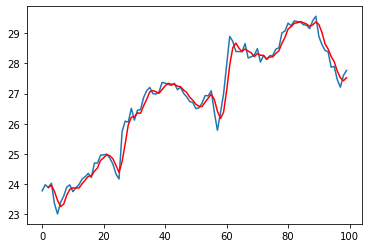

In [19]:
seriesData.head(100).plot()
rolling_mean.head(100).plot(color='red')
plt.show()

In [20]:
# Prediction using Moving Average
from numpy import mean

X = appleData.Close.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 2.974


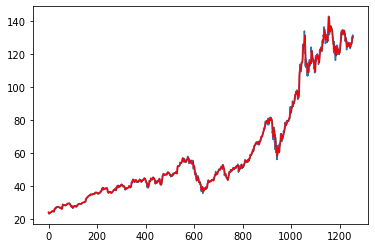

In [21]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

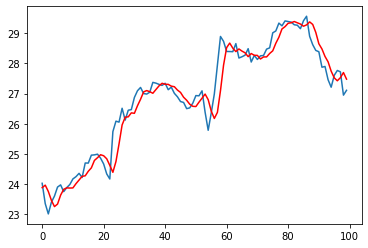

In [22]:
# Granular View of the Plot
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()

**General Notes**

 - **Heteroskedasticity** is said to occur when the variance of the unobservable error u, conditional on independent variables, is not constant.
 - Time series is stationary when the inverse of the lag function converges to zero.

### ARMA - Auto Regressive Moving Average

Xt = c + Zt + alpha1 * Xt-1 + ... + alphap * Xt-p + beta1 * Zt-1 + ... + betaq * Zt-q

    Alpha represents all the Auto Regression terms and Beta represents all the Moving Average terms.
    Z represents the error (white noise) terms.
    c is constant

The Auto Correlation and Partial Auto Correlation help in determining the order of the ARMA process. 

**Box Jenkins Approach**

Statisticians Box and Jenkins suggested an approach for identifying, estimating and fitting the time-series models.

The steps are:

    Identification
    Estimation
    Diagnostic Checking
    
**Identification**

This is the first step in the process. 

    Check if the time series is stationary or not.
    Get the parameters for ARMA model.

Stationarity Check

    Differencing
    Unit Root Method

Configuring AR and MA

    ACF and PACF plot will help in getting the p and q values for the model.

Some Observable Patterns:

    If the ACF is trailing after a particular lag value and shows a very hard cut-off in PACF after a specific lag value, the process is AR. Value of p is the lag value.

    If the the PACF is trailing off after a specific lag value and is having a very hard cut-off in the ACF after a particular lag value, the model is MA . Value of q is the lag value.
    
**Estimation and Diagnostic Checking**

    Estimation involves all the steps to minimize the loss from errors using OLS or MLE.

Diagnosting checking involves investigation of:

    Over-fitting
    Residual Errors using statistical methods
    
**Information Criterion for ARMA Model Selection**

    - Select model order (p, q) of time-series based on Residual Sum of Squares (RSS).
    - Optimal Model: min(f(RSS) + Penalty term for adding more terms/ lags)
    - Trade off: Adding extra terms vs penalty
    - Rule of Thumb: The model should be parsimonious (simple) with less number of lags/ terms.
    
    Types of Information Criterion:
    
    - Akaike's Information Criterion (AIC)
    - Schwarz's Bayesian Information Criterion (SBIC)
    - Hannan-Quinn Criterion (HQIC)
    
**What about ACF and PACF?** 

Sometimes, when we visualize the ACF and PCAF plots to determine the order of the model, it may not provide the clear picture due to ambiguity and in that case Information Criterion methods might provide better results.

Example: Let's say we are confused about ARMA(1, 2) and ARMA(2, 2). In order to make a decision, let's say we opted for AIC to determine the order. If AIC(ARMA(1, 2)) < AIC(ARMA(2, 2)), then we go ahead with ARMA(2, 2).
    

### ARIMA - Auto Regressive Integrated Moving Average

 - Autoregression: A model that uses the past values to predict the future values
 - Integrated: Making use of difference to make the data stationary
 - Moving Average: A model that makes use of historical observations from a moving average model
 
**Model Representation**

The standard representation of an ARIMA model is ARIMA(p,d,q).

    p: the number of lag observations also called as lag order
    d: number of observations that are differenced, degree of difference
    q: order of moving average or the size of the moving average window
    
Note: Very useful for non-stationary cases i.e. the series that has trend.

Please refer ***time_series_101.pynb*** for more details.

**Identification of Order of Differencing**

    Positive correlation to higher lags - Higher order differencing needed.
    Zero or negative correlation in first lag - No differencing needed.

**Optimal order of differencing**: Depends on at what order the prediction is closer to the actual value. Metric - RMSE, MAD etc.

**ARIMA Process**

 - Data is prepared by the degree of differencing to make it stationary.
 - A linear regression model is prepared based on the specified type and the number of terms.
 - One assumption is that the process that generated the observations is also an ARIMA process.
 
 
    

In [23]:
import pandas_datareader as pdr
appleData = pdr.get_data_yahoo('AAPL')
appleCloseTs = appleData.Close

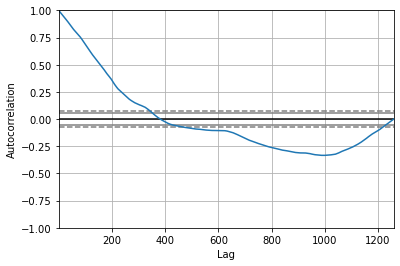

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(appleCloseTs)
plt.show()

/Users/smithkakar/.conda/envs/ds/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/smithkakar/.conda/envs/ds/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1258
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2258.973
Method:                       css-mle   S.D. of innovations              1.458
Date:                Sat, 19 Jun 2021   AIC                           4531.946
Time:                        19:50:36   BIC                           4567.906
Sample:                             1   HQIC                          4545.460
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0849      0.037      2.292      0.022       0.012       0.158
ar.L1.D.Close    -0.1196      0.028     -4.244      0.000      -0.175      -0.064
ar.L2.D.Close     0.0207      0.028     

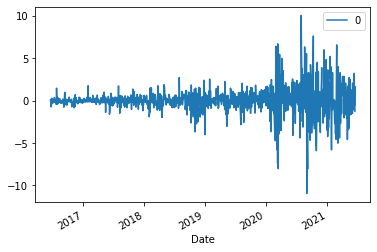

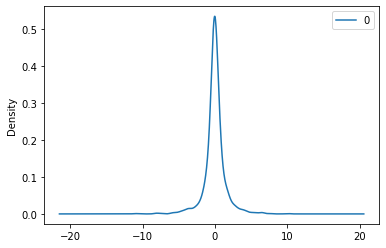

                 0
count  1258.000000
mean      0.000018
std       1.458106
min     -10.969821
25%      -0.431268
50%      -0.028846
75%       0.448287
max      10.039797


In [25]:
from statsmodels.tsa.arima_model import ARIMA 
# 5 lags; no. of observations differenced is 1; zero order for the moving window
model = ARIMA(appleCloseTs, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

### Forecasting

/Users/smithkakar/.conda/envs/ds/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Test MSE: 5.613


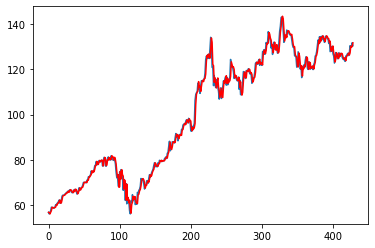

In [26]:
from sklearn.metrics import mean_squared_error

X = appleCloseTs.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [27]:
from pandas import Series
timeSeries  = [30,21,29,31,40,48,53,47,37,39,31,29,17,9,20,24,27,35,41,38,
          27,31,27,26,21,13,21,18,33,35,40,36,22,24,21,20,17,14,17,19,
          26,29,40,31,20,24,18,26,17,9,17,21,28,32,46,33,23,28,22,27,
          18,8,17,21,31,34,44,38,31,30,26,32]
ts = Series(timeSeries)
X = ts.values

In [28]:
X = X.astype('float64')
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
   
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print("MSE = ", error)

/Users/smithkakar/.conda/envs/ds/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=18.650694, expected=28.000000
predicted=24.901654, expected=22.000000
predicted=25.713328, expected=27.000000
predicted=29.598913, expected=18.000000
predicted=17.237802, expected=8.000000
predicted=8.439453, expected=17.000000
predicted=15.236531, expected=21.000000
predicted=24.254967, expected=31.000000
predicted=32.671336, expected=34.000000
predicted=30.706288, expected=44.000000
predicted=43.147267, expected=38.000000
predicted=35.767679, expected=31.000000
predicted=28.980102, expected=30.000000
predicted=27.519414, expected=26.000000
predicted=28.166802, expected=32.000000
MSE =  47.673857233371514


### Vector Auto Regression

Time series seen so far has been univariate and the current values predicted the future values. Sometimes there might be external phenomenon that affect a time series in more than one way.

 - Vector Auto Regression is a multivariate generalization of a univariate auto regressive time series model
 - Multivariate linear time series models
 - They are designed to capture the collective dynamics of multiple time series
 
**Applications**

 - Forecasting (Reduced Form VARs)
 - Structural Analysis (Structural VARs)

In [29]:
# Data Cleaning
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str
#import statsmodels.vector_ar.dynamic.DynamicVAR as DynamicVAR
mdata = sm.datasets.macrodata.load_pandas().data
print(mdata.head())
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly = dates_from_str(quarterly)
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pd.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()
print(data.head())

     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19  
             realgdp  realcons   realinv
1959-06-30  0.024942  0.015286  0.080213
1959-09-30 -0.001193  0.010386 -0.072131
1959-12-31  0.003495  0.001084  0.034425
1960-03-31  0.022190  0.009534  0.102664
1960-06-30 -0.004685

In [30]:
model = VAR(data)
results = model.fit(2)
results.summary()

/Users/smithkakar/.conda/envs/ds/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 19, Jun, 2021
Time:                     19:51:58
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

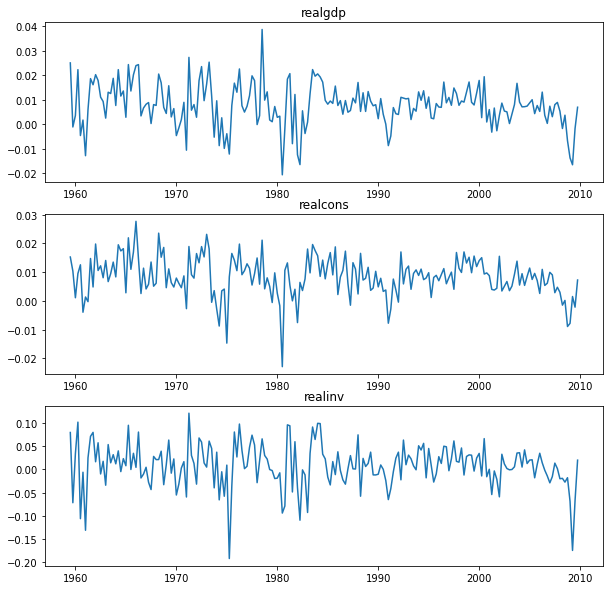

In [31]:
results.plot()
plt.show()

In [32]:
lag_order = results.k_ar
results.forecast(data.values[-lag_order:], 5)

array([[ 0.00502587,  0.0053712 ,  0.0051154 ],
       [ 0.00593683,  0.00784779, -0.00302473],
       [ 0.00662889,  0.00764349,  0.00393308],
       [ 0.00731516,  0.00797044,  0.00657495],
       [ 0.00732726,  0.00808811,  0.00649793]])

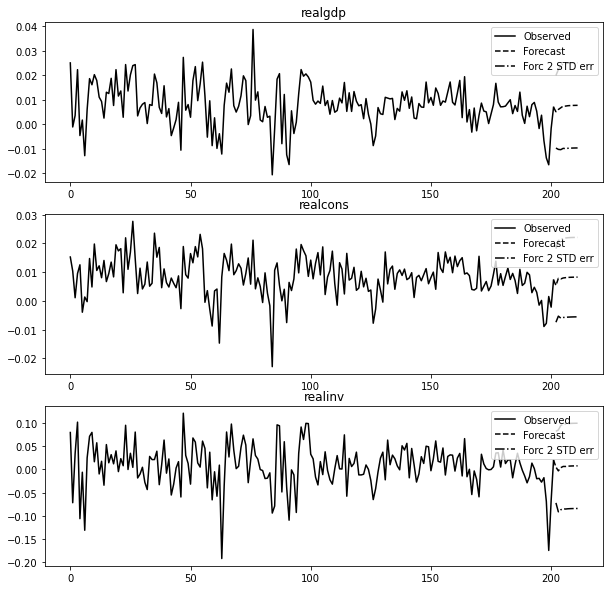

In [33]:
results.plot_forecast(10)
plt.show()

### Exponential Smoothing

**Weighted Smoothing**: In time series forecasting, all the past values may not equally contribute while predicting the future value. Value at lag 1 will contribute more than the remaining values, hence it is a good approach to assign weights that decay to each of the values that are a time step apart and use that to predict the future value.

One limitation to the approach suggested in the previous card is if the sum of the weights are greater than 1, then the prediction accuracy might not be good. To overcome this limitation, we go for an approach where the sum of the weights is 1.

    yhat = alpha * y(x) + (1-alpha) * yhat(x-1)
    
    where alpha is the smoothing factor
    
 - Simple to use over ARMA model.
 - No decision to be made apriori unlike ARMA model.
 - Forecasting may not be optimal.
 - Useful when so many forecasting to be done in less time.
 
**Significance of Exponential Smoothing**

 - Helps in smoothing all the noise from the time series.
 - For different alpha values, the smoothing will differ.
 - Higher values recreate the time series with some smoothing.
 - Forecasts only one value at a time.
 
The process described can be extended to predict multiple values. Depending on the trend of the time series either additive or multiplicative, the process of smoothing differs. All these process are collectively called **Holt-Winters** method.
 
How is ES different from ARMA class model in terms of estimation?

How does it handle trend and seasonality?
        


In [34]:
timeSeries = [30,21,29,31,40,48,53,47,37,39,31,29,17,9,20,24,27,35,41,38,
          27,31,27,26,21,13,21,18,33,35,40,36,22,24,21,20,17,14,17,19,
          26,29,40,31,20,24,18,26,17,9,17,21,28,32,46,33,23,28,22,27,
          18,8,17,21,31,34,44,38,31,30,26,32]
ts = Series(timeSeries)

In [35]:
def exp_smooth(ts, alpha):
    result = [ts[0]] # first value is same as series
    for n in range(1, len(ts)):
        result.append(alpha * ts[n] + (1 - alpha) * result[n-1])

    return result

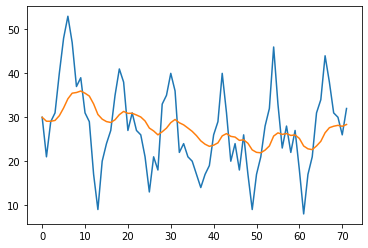

In [36]:
temp = exp_smooth(ts,0.1)
plt.plot(ts)
plt.plot(temp)

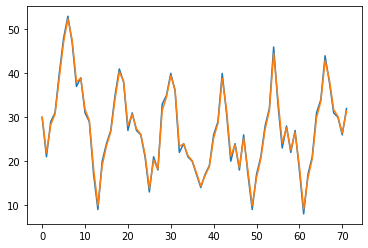

In [37]:
temp2 = exp_smooth(ts,0.9)
plt.plot(ts)
plt.plot(temp2)

## END